<a href="https://colab.research.google.com/github/AhuodY/Ahuod_Resp/blob/main/project123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
url = 'https://raw.githubusercontent.com/IsamAljawarneh/datasets/refs/heads/master/data/Chicago/AQ_data/chicago_eclipse_data_part_1.csv'
data = Table.read_table(url)

# Display the first few rows
data.show(5)


City,DeviceId,LocationName,Latitude,Longitude,ReadingDateTimeUTC,PM25,CalibratedPM25,CalibratedO3,CalibratedNO2,CO,Temperature,Humidity,BatteryLevel,PercentBattery,CellSignal
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:03:00,5.56109,nan,nan,nan,0.12358,27.3835,55.1285,4.23719,93.9648,-76
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:08:10,6.63391,nan,nan,nan,0.132103,27.0791,55.0598,4.23609,93.9648,-81
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:13:20,4.06871,nan,nan,nan,0.131126,27.0791,55.0354,4.23641,93.9648,-80
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:18:30,6.3517,nan,nan,nan,0.138784,26.9456,54.6326,4.23609,93.8633,-82
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:23:40,9.57407,nan,nan,nan,0.41307,26.8281,53.9078,4.23594,93.8633,-81


In [84]:
from datascience import Table
import numpy as np

def check_missing_values(data):
    """
    Returns a table showing the count of missing values for each column in the dataset.

    Parameters:
    - data: Table object containing the dataset.

    Returns:
    - Table with columns 'Column Name' and 'Missing Values'.
    """
    column_names = []
    missing_counts = []

    for label in data.labels:
        column = data.column(label)

        if np.issubdtype(type(column[0]), np.number):  # Check numeric columns
            missing = np.count_nonzero(np.isnan(column))
        else:  # Check non-numeric columns for empty strings
            missing = np.count_nonzero(column == '')

        column_names.append(label)
        missing_counts.append(missing)

    # Create and return a structured table
    return Table().with_columns(
        "Column Name", column_names,
        "Missing Values", missing_counts
    )

def filter_complete_rows(data, columns):
    """
    Filters rows in a Table to keep only rows where all specified columns
    have non-missing (not NaN) values.

    Parameters:
    - data: Table object containing the dataset.
    - columns: list of str, names of the columns to check for missing values.

    Returns:
    - Table object with filtered rows.
    """
    for column in columns:
        data = data.where(~np.isnan(data.column(column)))
    return data

In [85]:
# Check missing values **before cleaning**
print("\n\033[94mMissing values BEFORE cleaning:\033[0m")
missing_values_table_before = check_missing_values(data)
missing_values_table_before.show()



Missing values BEFORE cleaning:


Column Name,Missing Values
City,0
DeviceId,0
LocationName,0
Latitude,0
Longitude,0
ReadingDateTimeUTC,0
PM25,0
CalibratedPM25,34277
CalibratedO3,34277
CalibratedNO2,34277


In [69]:

def plot_cleaned_subset(data, column_name):
    """
    Filters out NaN values and plots a scatter plot for a given column.

    Parameters:
    - data: Table object containing the dataset.
    - column_name: str, name of the column to filter and plot.
    """

    # Filter out NaN values
    subset = data.where(np.isfinite(data.column(column_name))).take(np.arange(1000))

    # Debugging print to check if filtering is working
    print("\n\033[94mTotal rows in dataset:\033[0m", data.num_rows)
    print("\033[94mRows after removing NaNs for {}:\033[0m".format(column_name), subset.num_rows)

    # Plot the scatter chart
    subset.scatter('ReadingDateTimeUTC', column_name)

    plt.title(f'Sample of {column_name}')
    plt.xticks(rotation=45)
    plt.show()



Total rows in dataset: 129531
Rows after removing NaNs for CalibratedPM25: 1000


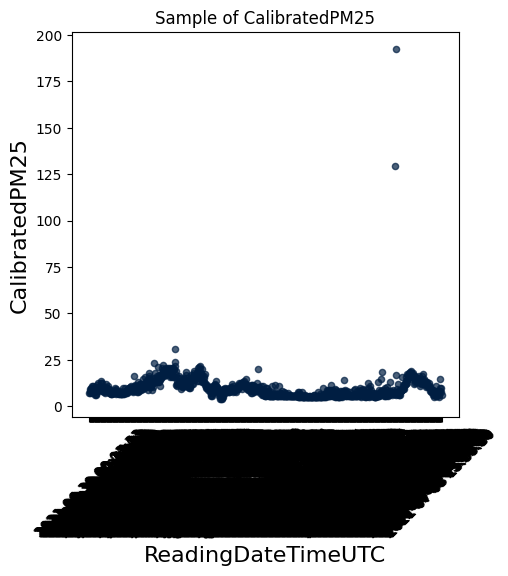


Total rows in dataset: 129531
Rows after removing NaNs for CalibratedO3: 1000


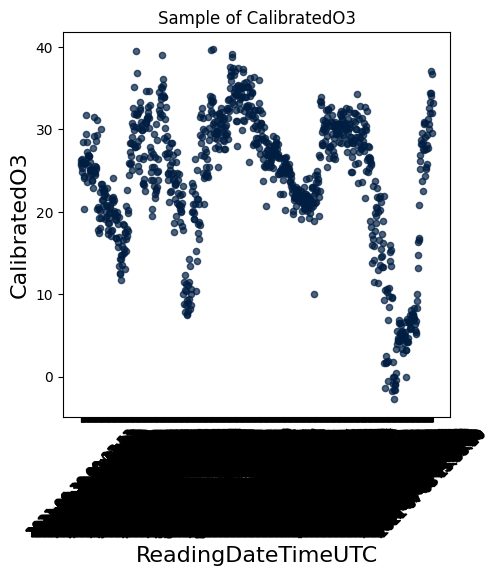


Total rows in dataset: 129531
Rows after removing NaNs for CalibratedNO2: 1000


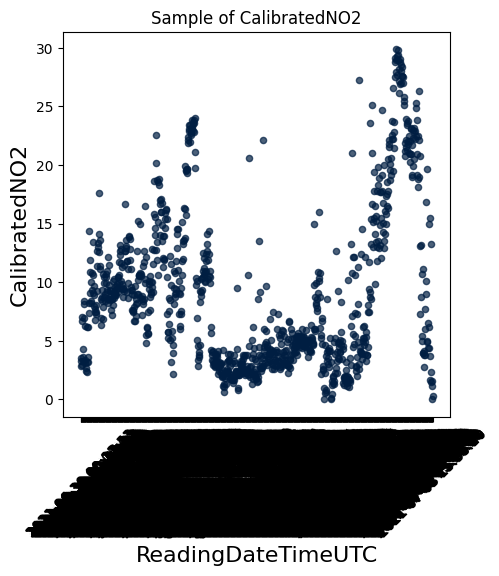

In [70]:
plot_cleaned_subset(data, 'CalibratedPM25')
plot_cleaned_subset(data, 'CalibratedO3')
plot_cleaned_subset(data, 'CalibratedNO2')

In [71]:
import datetime

def plot_time_series(subset, column_name):
    """
    Converts datetime column to Python datetime objects, extracts values,
    and creates a scatter plot.

    Parameters:
    - subset: Table object containing the filtered dataset.
    - column_name: str, name of the column to visualize.
    """
    # Convert datetime strings to Python datetime objects
    dates = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in subset.column('ReadingDateTimeUTC')]
    values = subset.column(column_name)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(dates, values, s=10, alpha=0.6)
    plt.title(f'Sample of {column_name}')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


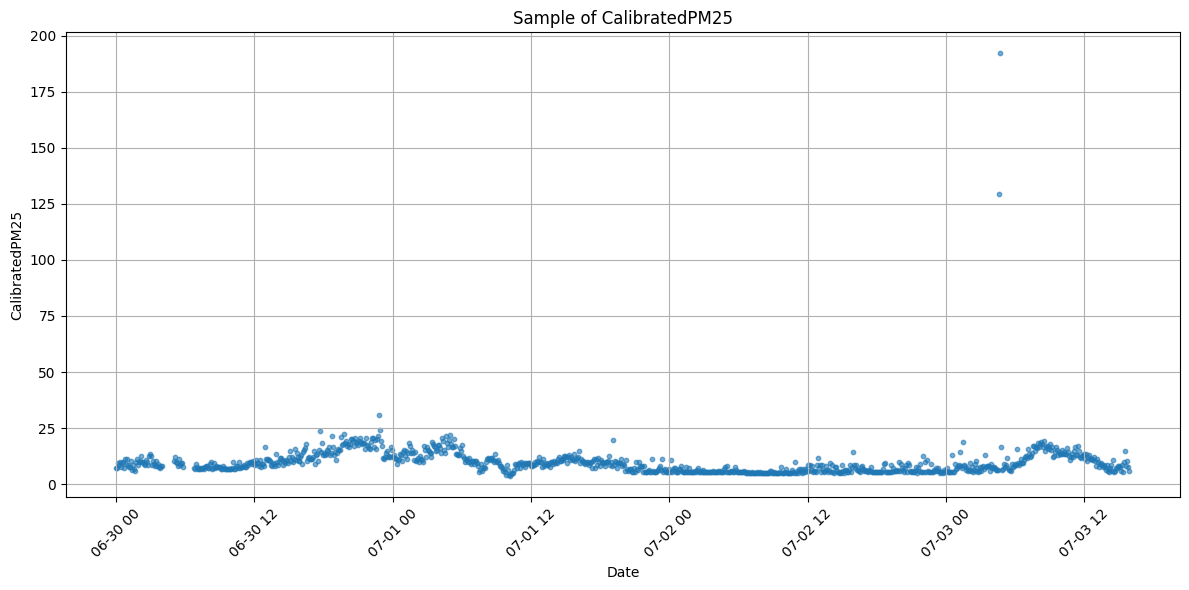

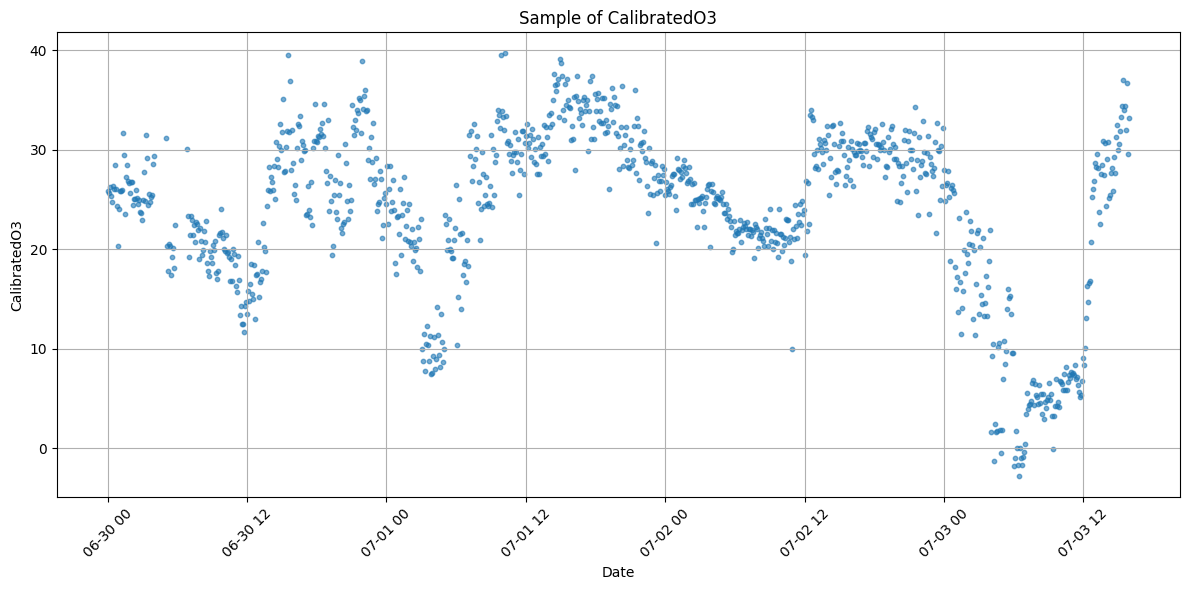

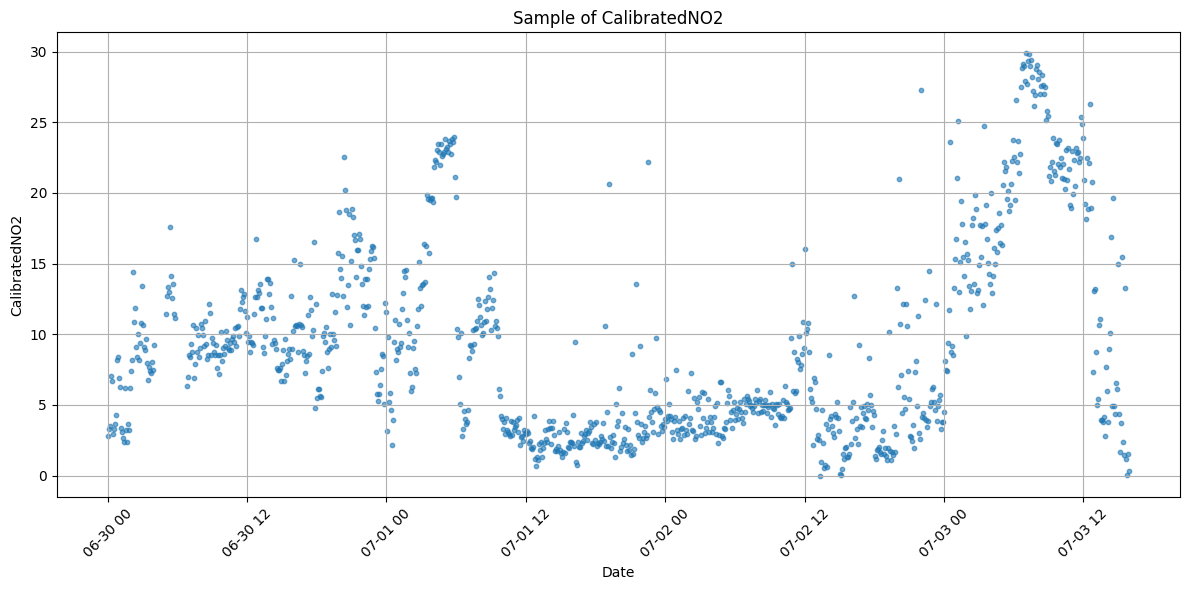

In [72]:
plot_time_series(subset_pm25, 'CalibratedPM25')
plot_time_series(subset_pm25, 'CalibratedO3')
plot_time_series(subset_pm25, 'CalibratedNO2')

In [87]:
# Check missing values **after cleaning**
print("\n\033[94mMissing values AFTER cleaning:\033[0m")
missing_values_table_after = check_missing_values(cleaned_data)
missing_values_table_after.show()


Missing values AFTER cleaning:


Column Name,Missing Values
City,0
DeviceId,0
LocationName,0
Latitude,0
Longitude,0
ReadingDateTimeUTC,0
PM25,0
CalibratedPM25,0
CalibratedO3,0
CalibratedNO2,0


In [89]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

def filter_outliers_and_plot(subset, column_name):
    """
    Filters outliers using IQR and plots the cleaned data.

    Parameters:
    - subset: Table object containing the dataset.
    - column_name: str, name of the column to process and visualize.
    """
    values = np.array(subset.column(column_name))

    # Calculate IQR
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\033[94mOutlier bounds for {column_name}:\033[0m\n")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

    # Create a mask for valid (non-outlier) values
    mask = (values >= lower_bound) & (values <= upper_bound)

    # Apply mask to clean dates and values
    clean_dates = np.array([datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in subset.column('ReadingDateTimeUTC')])[mask]
    clean_values = values[mask]

    # Plot cleaned data
    plt.figure(figsize=(12, 6))
    plt.scatter(clean_dates, clean_values, s=10, alpha=0.6, color='green')
    plt.title(f'{column_name} (Outliers Removed)')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Outlier bounds for CalibratedPM25:

Lower bound: -2.11125, Upper bound: 19.778750000000002


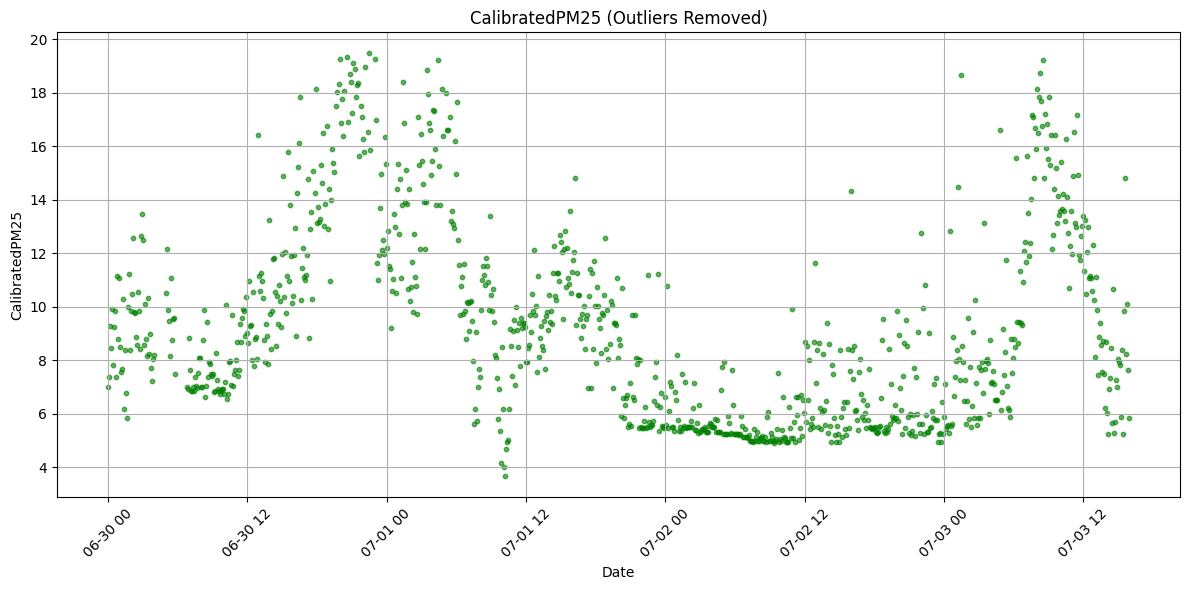

Outlier bounds for CalibratedO3:

Lower bound: 6.091249999999999, Upper bound: 44.401250000000005


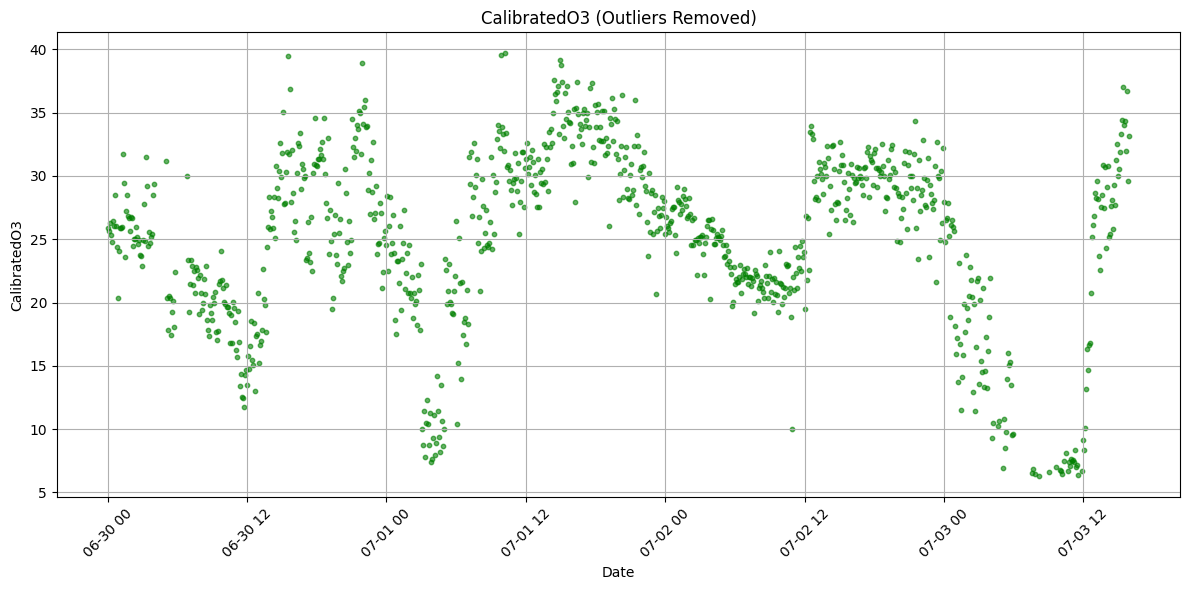

Outlier bounds for CalibratedNO2:

Lower bound: -9.62375, Upper bound: 26.08625


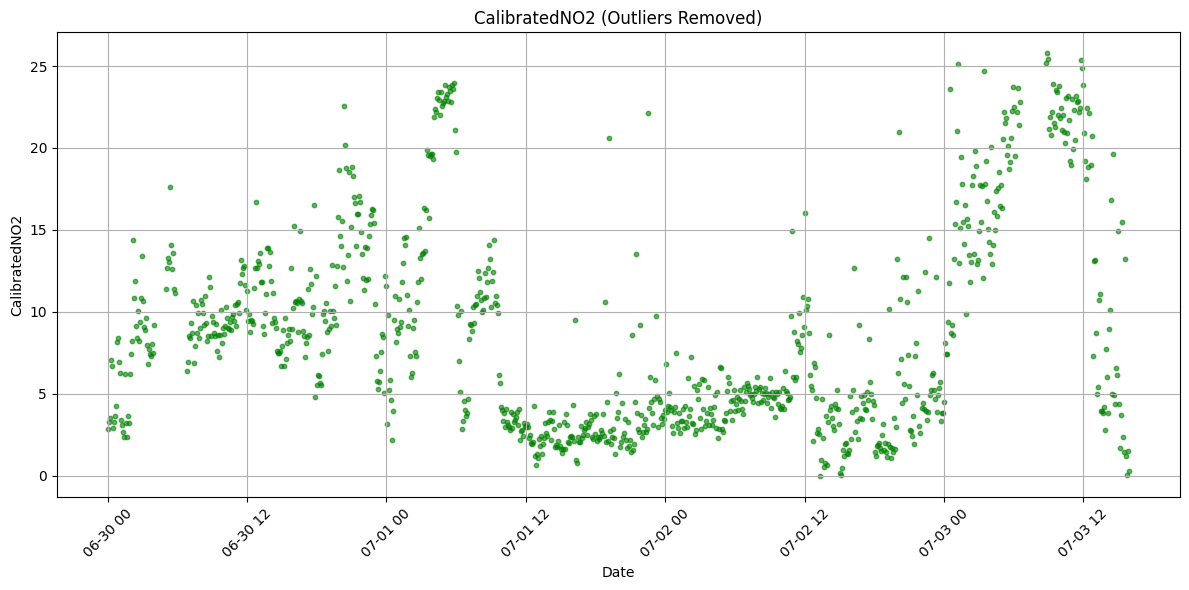

In [90]:
# Apply the function to different columns
filter_outliers_and_plot(subset_pm25, 'CalibratedPM25')
filter_outliers_and_plot(subset_pm25, 'CalibratedO3')
filter_outliers_and_plot(subset_pm25, 'CalibratedNO2')